In [3]:
## Author: Juan Maroñas (juan.maronnas@uam.es). Machine Learning Group, Universidad Autónoma de Madrid
## Deep into Prophet through Tutorials

## Multiplicative vs additive seasonality

In [4]:
## Python
import os

## Standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

usetex = mpl.checkdep_usetex(True)

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': usetex,
    'pgf.rcfonts': False,
    'xtick.bottom': True,
    'xtick.labelbottom': True,
    'ytick.left': True,
    'ytick.labelleft': True,
})

mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amssymb,amsfonts,amsthm}'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
mpl.rcParams['axes.titlesize'] = 25


## Prophet
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

usetex mode requires TeX.


In [5]:
## ========================================================================================== ##
## ===================================== CASE STUDY 1  ====================================== ##
## Prophet can use two types of seasonalities: additive and multiplicative (defaults additive)
#  The difference relies on the mean of the observation model N(y|mu,sigma) where by default
#  mu = s(t) + g(t) (additive) or mu = s(t)*g(t). A visual inspection of your series should tell
#  you when seasonality is additive or mulitplicative, but one should also perform model selection
#  if possible on this variable

#  Prophet docs has a nice example of this.

## Read data
data_dir = os.path.join('../data/','example_air_passengers.csv') 
df       = pd.read_csv(data_dir)

# cast to datetime type
df['ds_plot'] = df['ds']
df['ds']      = pd.to_datetime(df['ds'])

Text(0.5, 1.0, 'Whole temporal serie')

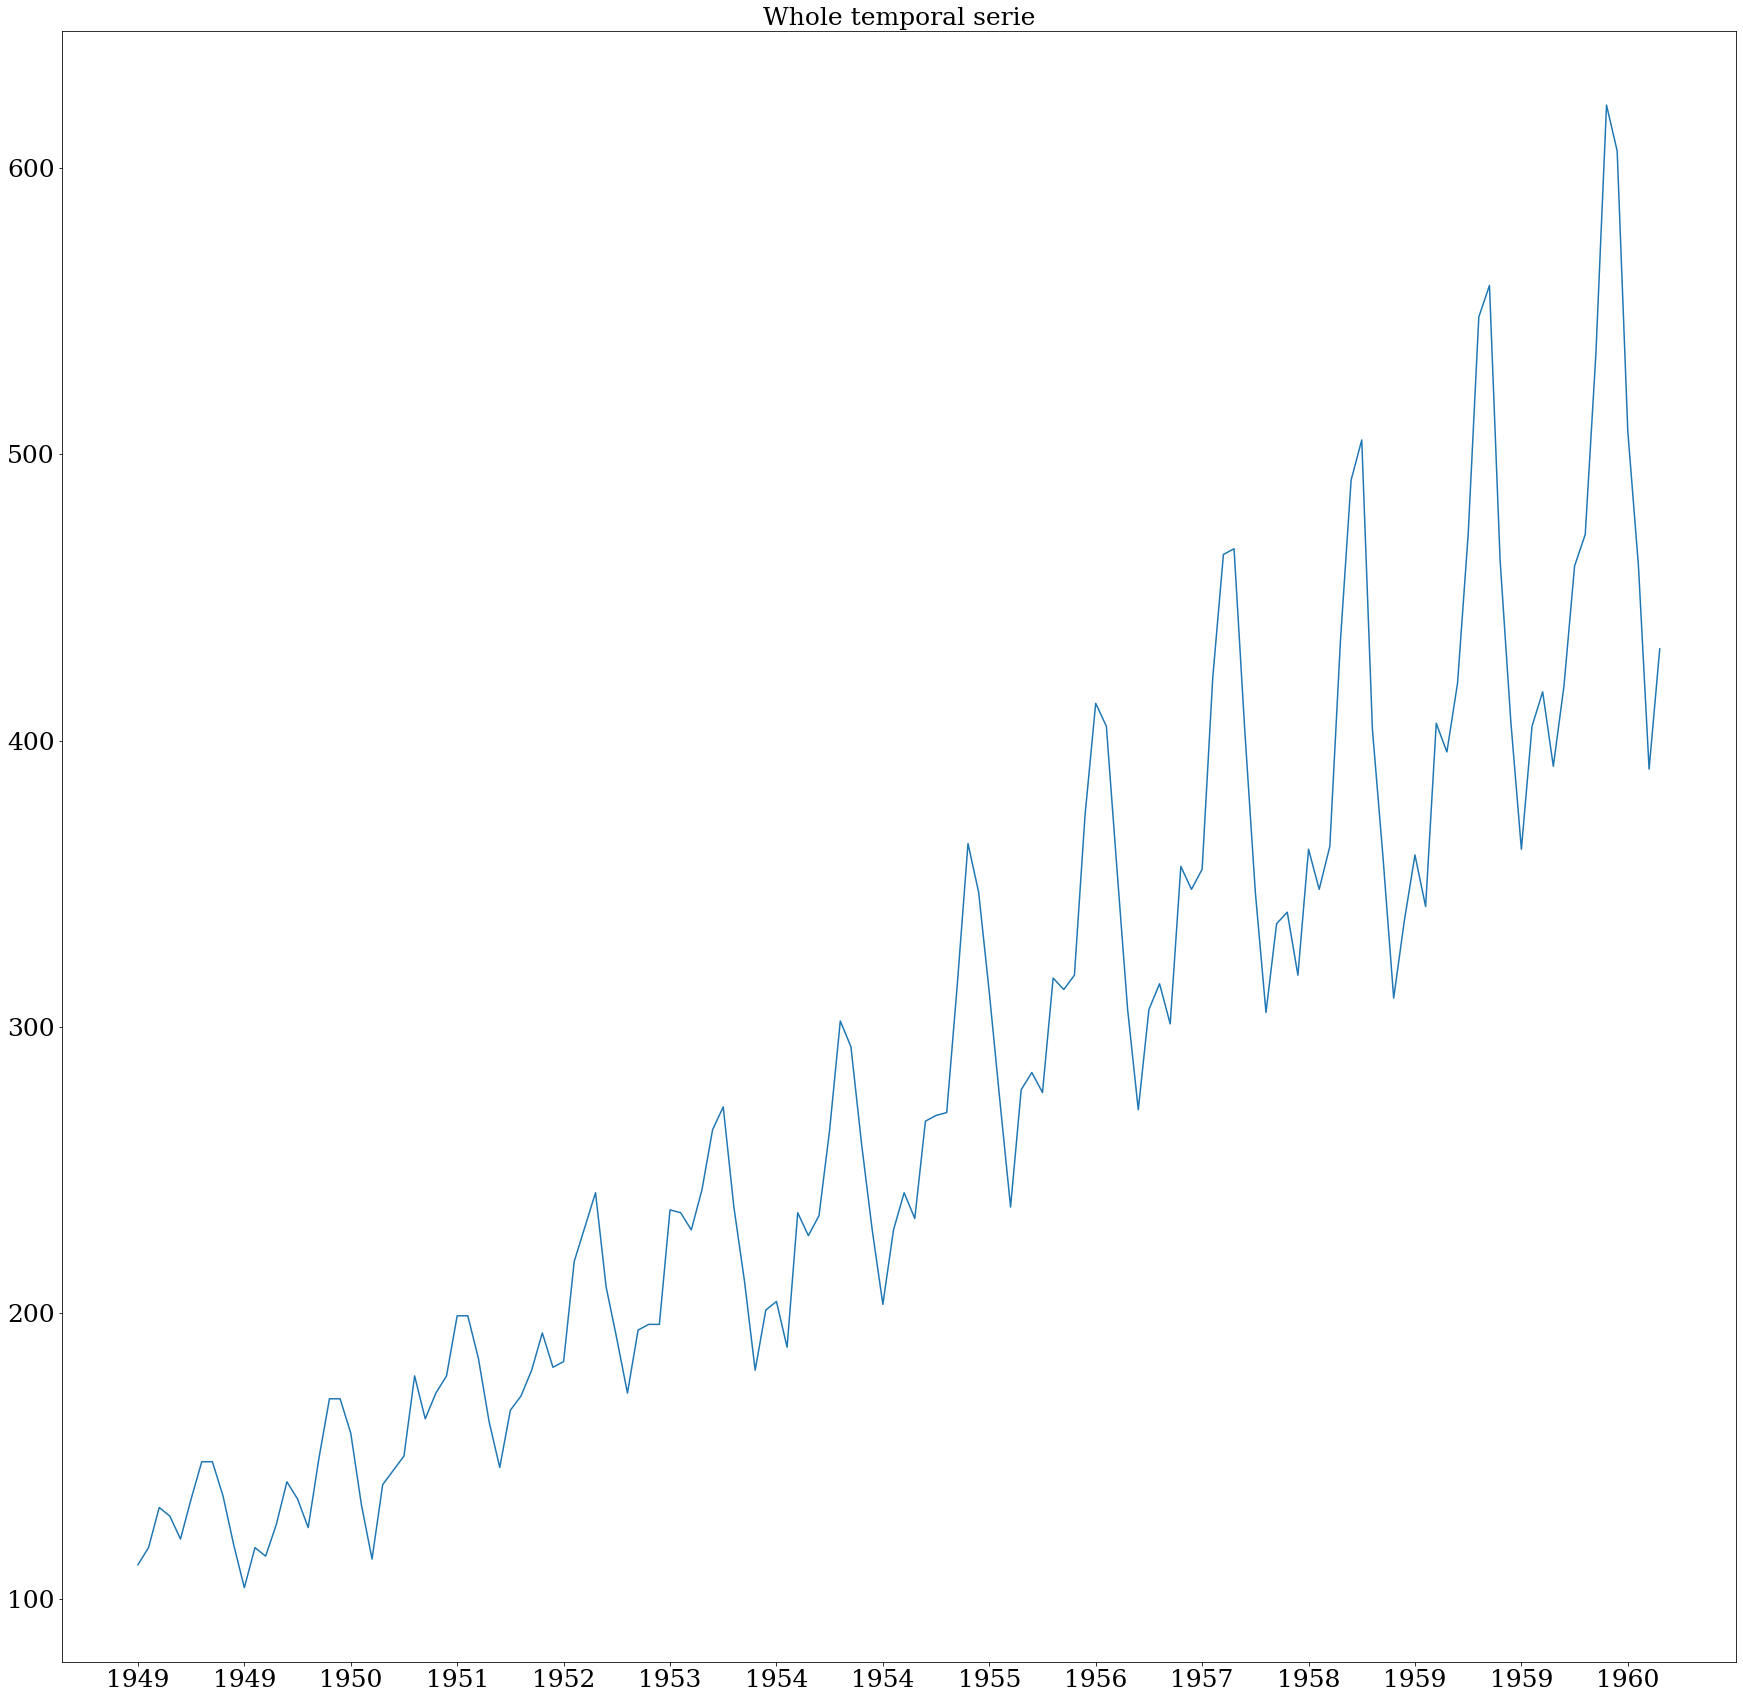

In [13]:
## Visualize whole series
fig, ax = plt.subplots(1,1,figsize=(30,30))

x = np.arange(0,len(df['y']))

ax.plot(x,df['y'])
ax.set_xticks(x[0::10], labels = df['ds'].dt.year[0::10])
ax.set_title('Whole temporal serie')

In [25]:
model = Prophet(
                    seasonality_mode    = 'multiplicative',
                    yearly_seasonality  = True,  
                    weekly_seasonality  = True,  
                )

In [26]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       507.667    0.00367816       136.218           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       510.697   6.44719e-05       54.8026      0.4146      0.4146      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       510.804   0.000249754       121.362    2.86e-06       0.001      316  LS failed, Hessian reset 
     274       510.856   2.70394e-05       77.1138    3.08e-07       0.001      417  LS failed, Hessian reset 
     299       510.858   6.62115e-06       77.1246           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        510.92   0.000405184       66.5219           1           1      580   
    Iter      log pro

In [27]:
forecast = model.predict(df)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


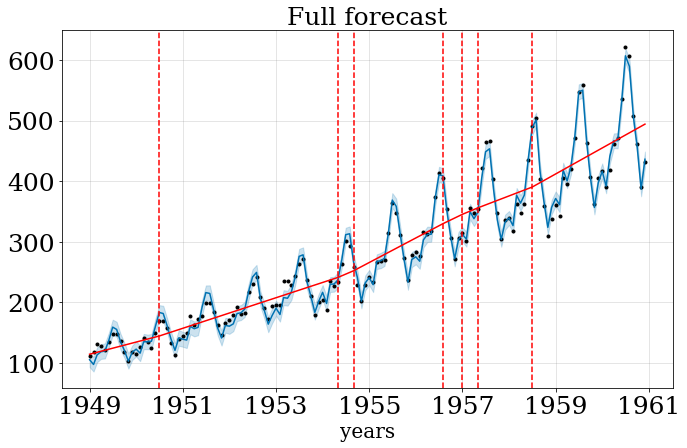

In [28]:
## Visualize forecasting
fig = model.plot(forecast)
plt.xlabel('years')
plt.ylabel('')
plt.title('Full forecast')

## add change points via matplotlib figure pointer
add_changepoints_to_plot(fig.gca(), model, forecast)
print("")

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 146.0, 'Year')

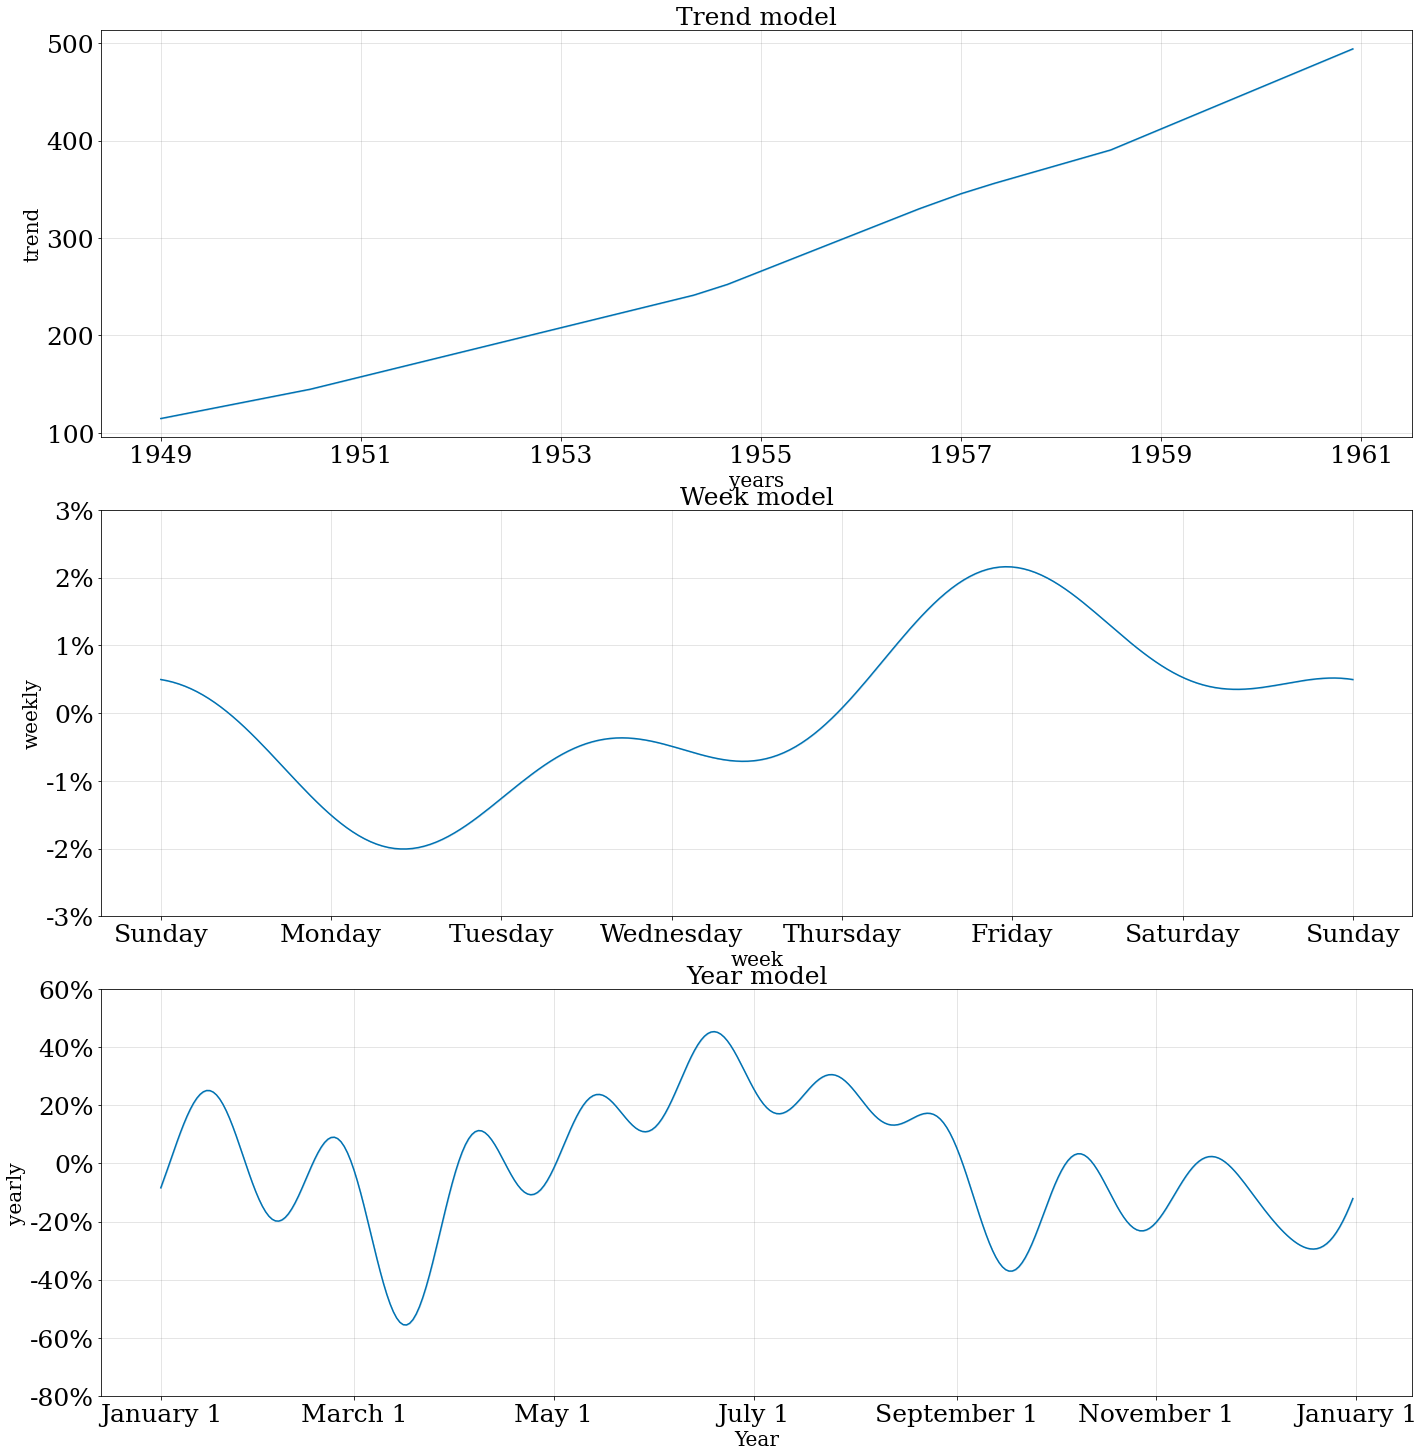

In [29]:
## Visualize the individual models used to create the observation model
fig     = model.plot_components(forecast, figsize = (20,20) )


ax1,ax2,ax3  = fig.get_axes()


ax1.set_xlabel('years')
ax1.set_title('Trend model')

ax2.set_title('Week model')
ax2.set_xlabel('week')

ax3.set_title('Year model')
ax3.set_xlabel('Year')



Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'yhat'],
      dtype='object')


[]

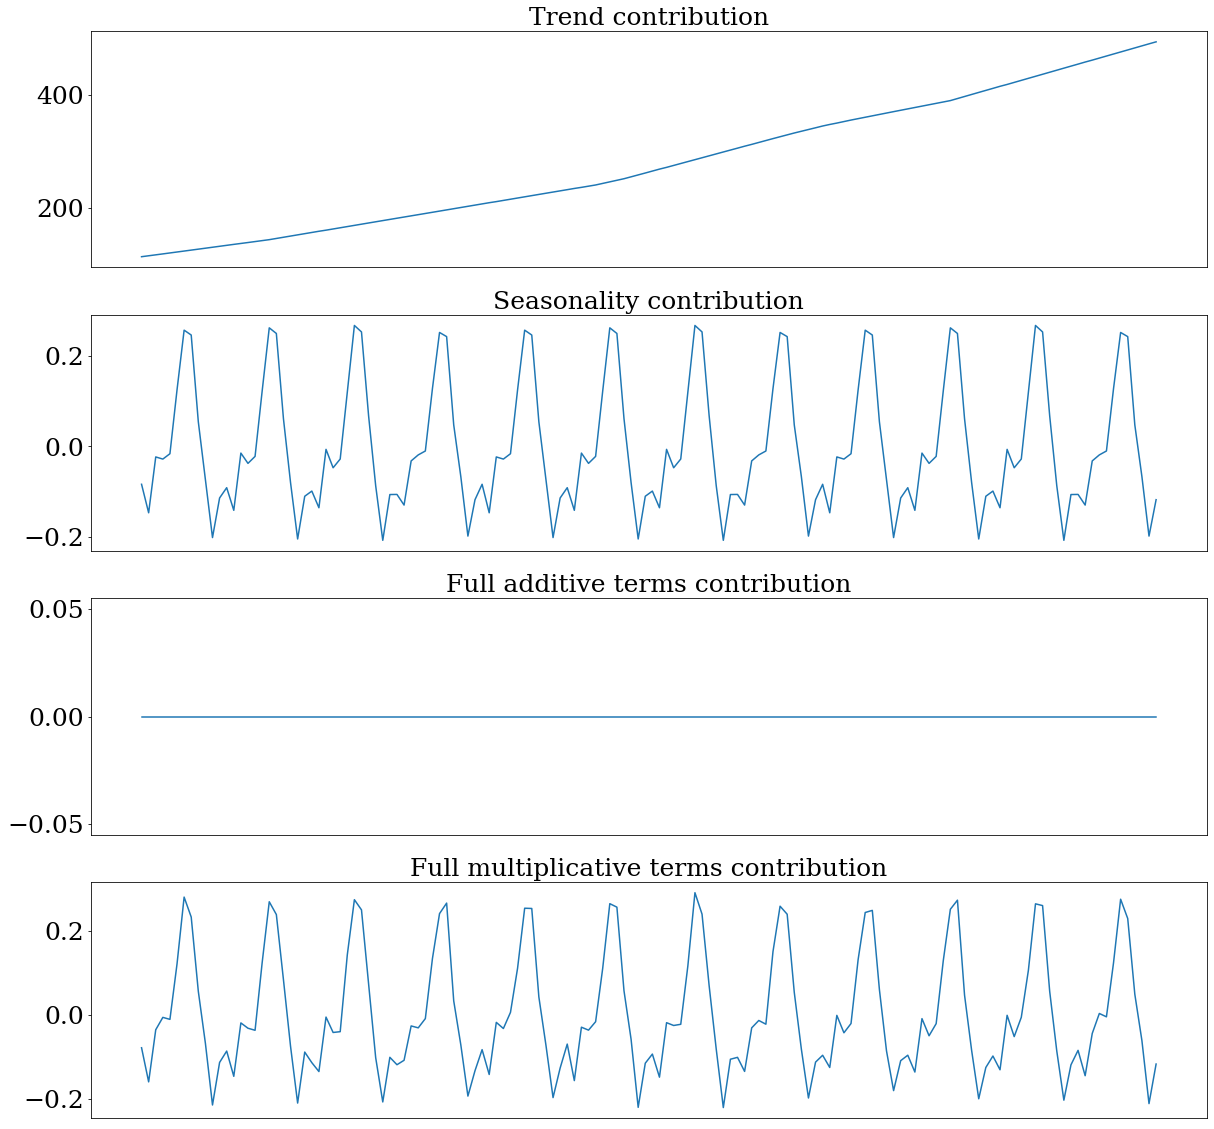

In [33]:
## Visualize the contribution of the individual models to the prediction. y(t) = g(t)+s(t) etc
print(forecast.keys())

x = np.arange(0,len(df['y']))

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(20,20))

ax1.plot(forecast['trend'])
ax1.fill_between(np.arange(0,len(forecast['trend'])),forecast['trend_lower'],forecast['trend_upper'],alpha = 0.5)
ax1.set_title('Trend contribution')
ax1.set_xticks([])

ax2.plot(forecast['yearly'])
ax2.fill_between(np.arange(0,len(forecast['yearly'])),forecast['yearly_lower'],forecast['yearly_upper'],alpha = 0.5)
ax2.set_title('Seasonality contribution')
ax2.set_xticks([])

ax3.plot(forecast['additive_terms'])
ax3.fill_between(np.arange(0,len(forecast['additive_terms'])),forecast['additive_terms_lower'],forecast['additive_terms_upper'],alpha = 0.5)
ax3.set_title('Full additive terms contribution')
ax3.set_xticks([])

ax4.plot(forecast['multiplicative_terms'])
ax4.fill_between(np.arange(0,len(forecast['multiplicative_terms'])),forecast['multiplicative_terms_lower'],forecast['multiplicative_terms_upper'],alpha = 0.9)
ax4.set_title('Full multiplicative terms contribution')
ax4.set_xticks([])
